In [134]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm
import corner
import scipy.stats as st
from statistics import mean
from collections import Counter

Get the 13 interested proteins and reorder them nicely

In [222]:
file_path = 'Datasets/mt_genes_metadata.csv'

met = pd.read_csv(file_path)

pro_code=met[met['gene_type']=='protein_coding']
intpro=pro_code['gene_name'].tolist()
intpro=['MT-ND1','MT-ND2','MT-ND3','MT-ND4','MT-ND4L','MT-ND5','MT-ND6', 'MT-CO1', 'MT-CO2','MT-CO3', 'MT-ATP6', 'MT-ATP8', 'MT-CYB']
intpro

['MT-ND1',
 'MT-ND2',
 'MT-ND3',
 'MT-ND4',
 'MT-ND4L',
 'MT-ND5',
 'MT-ND6',
 'MT-CO1',
 'MT-CO2',
 'MT-CO3',
 'MT-ATP6',
 'MT-ATP8',
 'MT-CYB']

Read the 4 files: 2 donors, each with 2 types (?)

In [223]:
file_path = 'Datasets/Donor1_CD4_Genes.csv'

pat1_4 = pd.read_csv(file_path)

pat1_4int=pd.DataFrame([pat1_4[i] for i in intpro]).T

file_path = 'Datasets/Donor1_CD8_Genes.csv'

pat1_8 = pd.read_csv(file_path)

pat1_8int=pd.DataFrame([pat1_8[i] for i in intpro]).T

file_path = 'Datasets/Donor2_CD4_Genes.csv'

pat2_4 = pd.read_csv(file_path)

pat2_4int=pd.DataFrame([pat2_4[i] for i in intpro]).T

file_path = 'Datasets/Donor2_CD8_Genes.csv'

pat2_8 = pd.read_csv(file_path)

pat2_8int=pd.DataFrame([pat2_8[i] for i in intpro]).T


For each file, find the mean of each column in order of the protein names in the list 'intpro'

In [224]:
p14m=[]
for i in intpro:
    p14m.append(mean(pat1_4int.loc[:,i]))

p18m=[]
for i in intpro:
    p18m.append(mean(pat1_8int.loc[:,i]))
p24m=[]
for i in intpro:
    p24m.append(mean(pat2_4int.loc[:,i]))

p28m=[]
for i in intpro:
    p28m.append(mean(pat2_8int.loc[:,i]))
    
meanlist=np.array([p14m,p18m,p24m,p28m])
meanlist

array([[ 7.83067867,  4.46364266,  5.51038781,  3.23234072, 12.52943213,
         5.03081717,  1.0218144 , 19.30367036, 32.6284626 , 26.20637119,
         2.10734072, 19.13642659, 20.26142659],
       [11.20038259,  6.58727881,  7.91822095,  5.63749402, 19.20086083,
         6.61406026,  1.33333333, 26.19081779, 46.96652319, 37.06791009,
         3.22716404, 27.29029173, 28.59349593],
       [13.32201289,  4.97843332, 13.02999504,  5.10163609, 13.82300446,
         7.53222608,  1.77590481, 17.56098166, 27.96405553, 24.19459593,
         2.79400099, 18.50247893, 22.15914725],
       [14.58031838,  6.34804631, 13.83285094,  7.09696093, 16.66063676,
        10.2170767 ,  3.01157742, 30.33357453, 36.82633864, 27.99855282,
         4.35383502, 22.46816208, 26.39435601]])

Find the mean of each protein but combining all 4 files and find the 'total mean'

In [225]:
total_int=pd.concat([pat1_4int,pat1_8int, pat2_4int,pat2_8int])

totalm=[]
for i in intpro:
    totalm.append(mean(total_int.loc[:,i]))


The following is just an array of the indiv file means + total means

In [226]:
combmean=np.array([p14m,p18m,p24m,p28m,totalm]) 

Calculating proportions in prep for a χ² test. So far just testing on a few specific columns, will be trying to automate this through a 'for' loop on 'intpro'

In [197]:
p14ND1p=pat1_4int['MT-ND1'].value_counts(normalize=True, ascending=True)
max(p14ND1p.index)
p14ND1p=p14ND1p.reindex(range(0,max(p14ND1p.index)+1),fill_value=0)
[p14ND1p]

[MT-ND1
 0     0.018698
 1     0.034972
 2     0.055748
 3     0.069252
 4     0.086565
 5     0.090028
 6     0.101454
 7     0.087604
 8     0.086565
 9     0.072368
 10    0.053670
 11    0.049515
 12    0.041551
 13    0.031510
 14    0.024584
 15    0.017313
 16    0.019391
 17    0.012812
 18    0.010734
 19    0.010388
 20    0.005540
 21    0.004155
 22    0.003116
 23    0.003463
 24    0.002078
 25    0.001039
 26    0.001385
 27    0.000693
 28    0.000693
 29    0.000693
 30    0.000693
 31    0.000346
 32    0.000346
 33    0.000000
 34    0.000000
 35    0.000000
 36    0.000000
 37    0.000346
 38    0.000346
 39    0.000000
 40    0.000000
 41    0.000000
 42    0.000000
 43    0.000000
 44    0.000000
 45    0.000000
 46    0.000000
 47    0.000000
 48    0.000000
 49    0.000000
 50    0.000346
 Name: proportion, dtype: float64]

In [201]:
p14ND2p=pat1_4int['MT-ND2'].value_counts(normalize=True, ascending=True)
max(p14ND2p.index)
p14ND2p=p14ND2p.reindex(range(0,max(p14ND2p.index)+1),fill_value=0)
tw=[p14ND1p,p14ND2p]

In [213]:
[p14ND1p.values,p14ND2p.values]

[array([0.01869806, 0.0349723 , 0.05574792, 0.06925208, 0.0865651 ,
        0.0900277 , 0.10145429, 0.08760388, 0.0865651 , 0.07236842,
        0.05367036, 0.04951524, 0.04155125, 0.0315097 , 0.02458449,
        0.01731302, 0.01939058, 0.01281163, 0.01073407, 0.01038781,
        0.00554017, 0.00415512, 0.00311634, 0.0034626 , 0.00207756,
        0.00103878, 0.00138504, 0.00069252, 0.00069252, 0.00069252,
        0.00069252, 0.00034626, 0.00034626, 0.        , 0.        ,
        0.        , 0.        , 0.00034626, 0.00034626, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00034626]),
 array([0.05020776, 0.09972299, 0.1398892 , 0.15477839, 0.13469529,
        0.11391967, 0.08725762, 0.06786704, 0.04639889, 0.03739612,
        0.02562327, 0.01281163, 0.00831025, 0.00727147, 0.00554017,
        0.00380886, 0.00103878, 0.0017313 , 0.00103878, 0.00034626,
        0.        , 0.    

Just some manual extraction of columns, in case we need them

In [81]:
p14ND1=pat1_4int.loc[:, 'MT-ND1']
p14ND2=pat1_4int.loc[:, 'MT-ND2']
p14ND3=pat1_4int.loc[:, 'MT-ND3']
p14ND4=pat1_4int.loc[:, 'MT-ND4']
p14ND4L=pat1_4int.loc[:, 'MT-ND4L']
p14ND5=pat1_4int.loc[:, 'MT-ND5']
p14ND6=pat1_4int.loc[:, 'MT-ND6']
p14CO1=pat1_4int.loc[:, 'MT-CO1']
p14CO2=pat1_4int.loc[:, 'MT-CO2']
p14CO3=pat1_4int.loc[:, 'MT-CO3']
p14A8=pat1_4int.loc[:,"MT-ATP8"]
p14A6=pat1_4int.loc[:, "MT-ATP6"]
p14CYB=pat1_4int.loc[:, "MT-CYB"]

p14ND1m=mean(p14ND1)
p14ND2m=mean(p14ND2)
p14ND3m=mean(p14ND3)
p14ND4m=mean(p14ND4)
p14ND4Lm=mean(p14ND4L)
p14ND5m=mean(p14ND5)
p14ND6m=mean(p14ND6)
p14CO1m=mean(p14CO1)
p14CO2m=mean(p14CO2)
p14CO3m=mean(p14CO3)
p14A8m=mean(p14A8)
p14A6m=mean(p14A6)
p14CYBm=mean(p14CYB)
p14m=[p14ND1m,p14ND2m,p14ND3m,p14ND4m,p14ND4Lm, p14ND5m, p14ND6m, p14CO1m, p14CO2m, p14CO3m, p14A8m, p14A6m, p14CYBm]
p14m

[7.830678670360111,
 4.463642659279778,
 5.510387811634349,
 3.2323407202216066,
 12.529432132963988,
 5.030817174515235,
 1.021814404432133,
 19.303670360110804,
 32.62846260387812,
 26.206371191135734,
 19.136426592797783,
 2.1073407202216066,
 20.261426592797783]

In [4]:

p18ND1=pat1_8int[["MT-ND1"]]
p18ND2=pat1_8int[["MT-ND2"]]
p18ND3=pat1_8int[["MT-ND3"]]
p18ND4=pat1_8int[["MT-ND4"]]
p18ND4L=pat1_8int[["MT-ND4L"]]
p18ND5=pat1_8int[["MT-ND5"]]
p18ND6=pat1_8int[["MT-ND6"]]
p18CO1=pat1_8int[["MT-CO1"]]
p18CO2=pat1_8int[["MT-CO2"]]
p18CO3=pat1_8int[["MT-CO3"]]
p18A8=pat1_8int[["MT-ATP8"]]
p18A6=pat1_8int[["MT-ATP6"]]
p18CYB=pat1_8int[["MT-CYB"]]

In [5]:

p24ND1=pat2_4int[["MT-ND1"]]
p24ND2=pat2_4int[["MT-ND2"]]
p24ND3=pat2_4int[["MT-ND3"]]
p24ND4=pat2_4int[["MT-ND4"]]
p24ND4L=pat2_4int[["MT-ND4L"]]
p24ND5=pat2_4int[["MT-ND5"]]
p24ND6=pat2_4int[["MT-ND6"]]
p24CO1=pat2_4int[["MT-CO1"]]
p24CO2=pat2_4int[["MT-CO2"]]
p24CO3=pat2_4int[["MT-CO3"]]
p24A8=pat2_4int[["MT-ATP8"]]
p24A6=pat2_4int[["MT-ATP6"]]
p24CYB=pat2_4int[["MT-CYB"]]

In [82]:

p28ND1=pat2_8int[["MT-ND1"]]
p28ND2=pat2_8int[["MT-ND2"]]
p28ND3=pat2_8int[["MT-ND3"]]
p28ND4=pat2_8int[["MT-ND4"]]
p28ND4L=pat2_8int[["MT-ND4L"]]
p28ND5=pat2_8int[["MT-ND5"]]
p28ND6=pat2_8int[["MT-ND6"]]
p28CO1=pat2_8int[["MT-CO1"]]
p28CO2=pat2_8int[["MT-CO2"]]
p28CO3=pat2_8int[["MT-CO3"]]
p228A8=pat2_8int[["MT-ATP8"]]
p28A6=pat2_8int[["MT-ATP6"]]
p28CYB=pat2_8int[["MT-CYB"]]

,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
0,12,3,23,53,34,3,38,6,20,5,7,7,20
1,8,4,24,35,10,2,34,3,15,7,6,1,17
2,7,2,16,30,8,1,19,6,20,3,7,0,15
3,3,2,25,23,14,5,23,2,13,4,6,3,14
4,6,3,6,26,14,1,11,4,14,0,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,1,1,22,28,8,2,25,3,14,6,1,0,13
2087,8,7,12,24,14,2,35,6,19,4,3,0,19
2088,29,16,37,86,48,8,59,16,40,8,14,0,54
2089,7,9,16,42,21,3,31,2,21,11,2,0,26


Me playing with lin models of the form z=ax+by+c

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [a]
>Slice: [b]
>Slice: [sigma]


c:\Users\lizar\anaconda3\envs\pymc_env\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


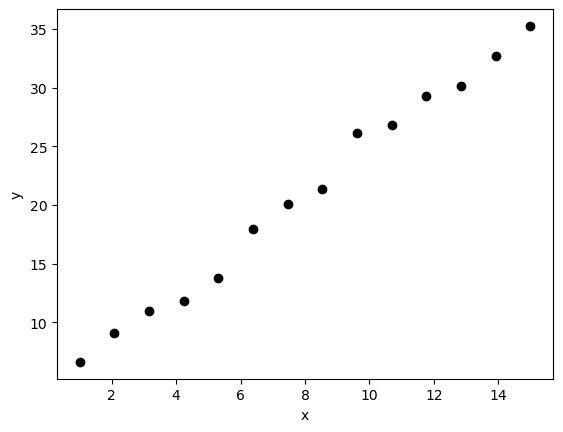

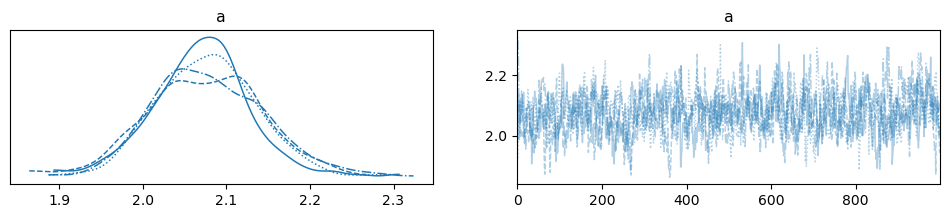

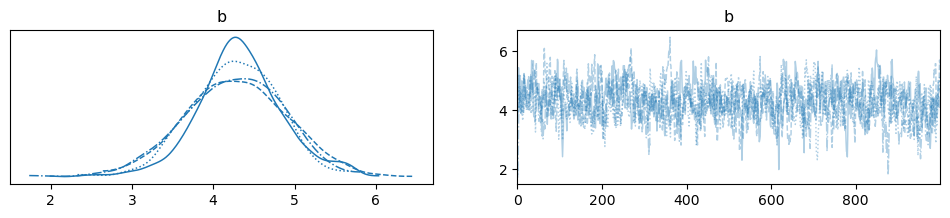

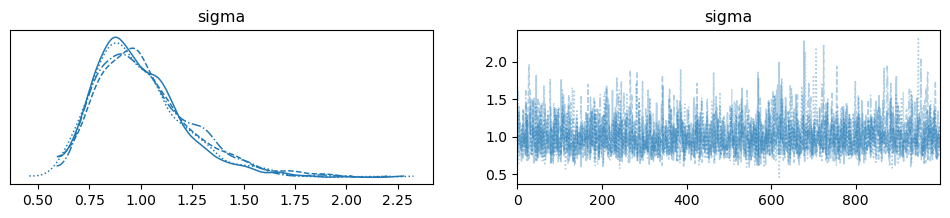

In [2]:
# Here, we only have one variable
x = np.linspace(1,15,14)
# We define a
a = 2
# We define b
b = 5
noise = np.random.normal(0,1,14)
# And y is a simple linear function of x.
# However, in the real world, there will be measurement uncertainty.
y = a*x+b+noise
plt.plot(x,y,"ko")
plt.xlabel("x")
plt.ylabel("y")
linear_model = pm.Model()

# Define the PyMC model
with linear_model:
    # Priors for unknown parameters
    a_prior = pm.Normal('a', mu=0, sigma=10)
    b_prior = pm.Normal('b', mu=0, sigma=10)
    #c_prior=pm.Normal('c',mu=0,sigma=10)
    sigma_prior = pm.HalfNormal('sigma', sigma=2)

    # Expected value of outcome
    mu = a_prior *x +b_prior

    # Likelihood (sampling distribution) of observations
    vals = pm.Normal('vals', mu=mu, sigma=sigma_prior, observed=y)
    step = pm.Slice()
    tracel = pm.sample(1000, step=step, return_inferencedata=True)
    az.plot_trace(tracel.posterior["a"]);
    az.plot_trace(tracel.posterior["b"]);
    #az.plot_trace(trace1.posterior["c"]);
    az.plot_trace(tracel.posterior["sigma"]);

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [c]
>Slice: [d]
>Slice: [e]
>Slice: [sigma]


c:\Users\lizar\anaconda3\envs\pymc_env\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


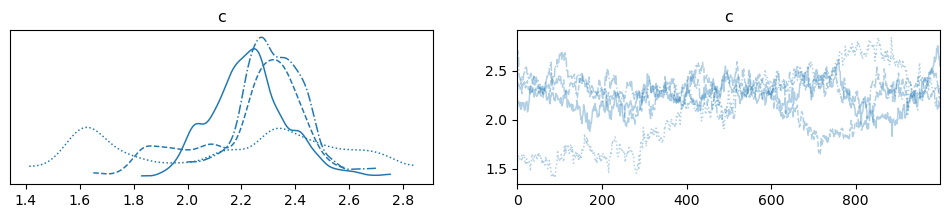

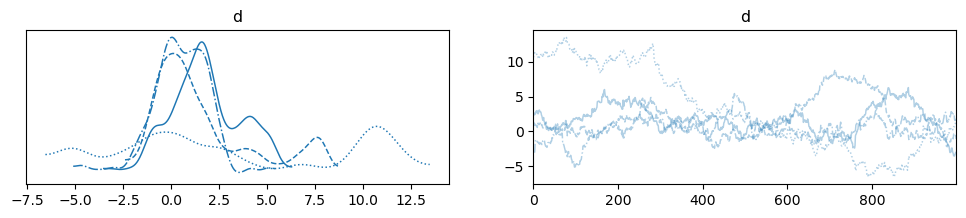

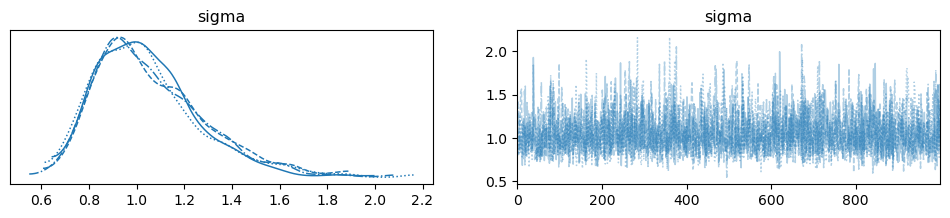

In [3]:
# Here, we only have one variable
w = np.linspace(1,16,15)
v=np.linspace(1,2,15)
# We define a
c = 2
# We define b
d = 5
e = 1
no = np.random.normal(0,1,15)
# And y is a simple linear function of x.
# However, in the real world, there will be measurement uncertainty.
z = c*w+d*v+e+no
#plt.plot(x,y,"ko")
#plt.xlabel("x")
#plt.ylabel("y")
lm = pm.Model()

# Define the PyMC model
with lm:
    # Priors for unknown parameters
    c_prior = pm.Normal('c', mu=0, sigma=10)
    d_prior = pm.Normal('d', mu=0, sigma=10)
    e_prior=pm.Normal('e',mu=0,sigma=10)
    s_p = pm.HalfNormal('sigma', sigma=2)

    # Expected value of outcome
    m = c_prior *w+d_prior*v +e_prior

    # Likelihood (sampling distribution) of observations
    vals = pm.Normal('vals', mu=m, sigma=s_p, observed=z)
    step = pm.Slice()
    tl = pm.sample(1000, step=step, return_inferencedata=True)
    az.plot_trace(tl.posterior["c"]);
    az.plot_trace(tl.posterior["d"]);
    #az.plot_trace(t1.posterior["e"]);
    az.plot_trace(tl.posterior["sigma"]);

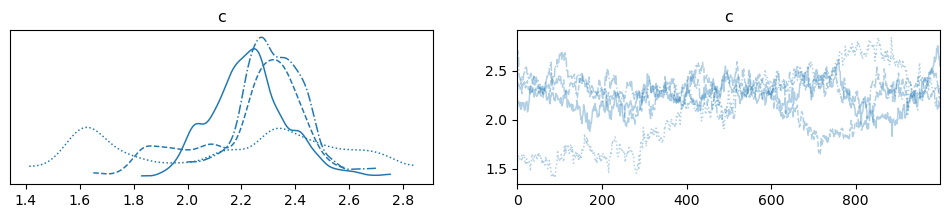

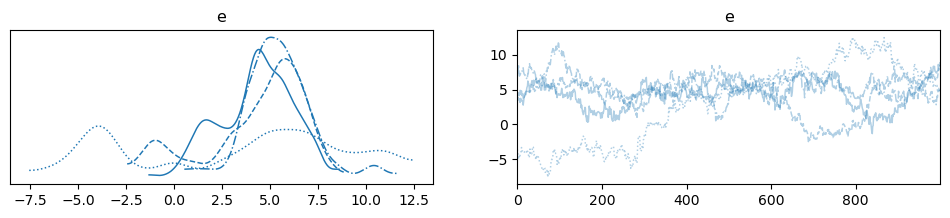

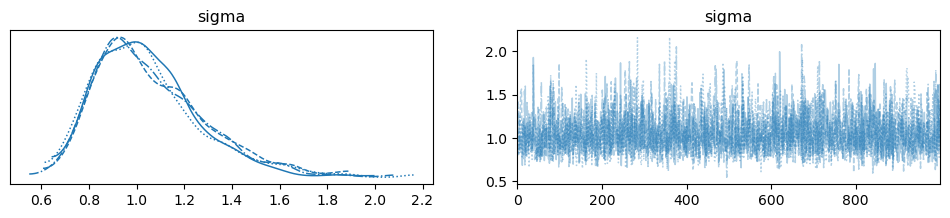

In [5]:
with lm:    
    az.plot_trace(tl.posterior["c"]);
    #az.plot_trace(tl.posterior["d"]);
    az.plot_trace(tl.posterior["e"]);
    az.plot_trace(tl.posterior["sigma"]);

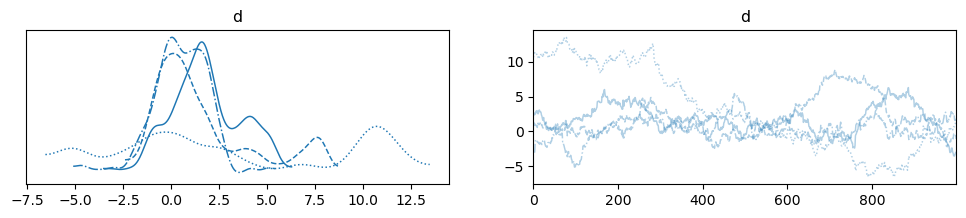

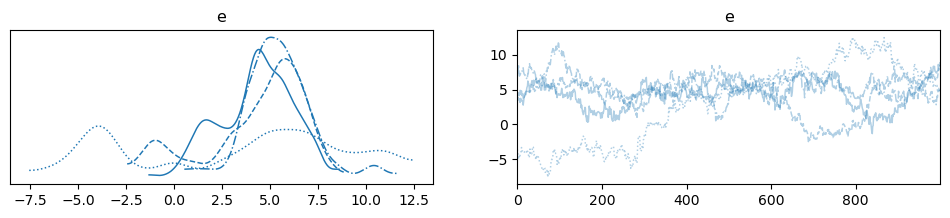

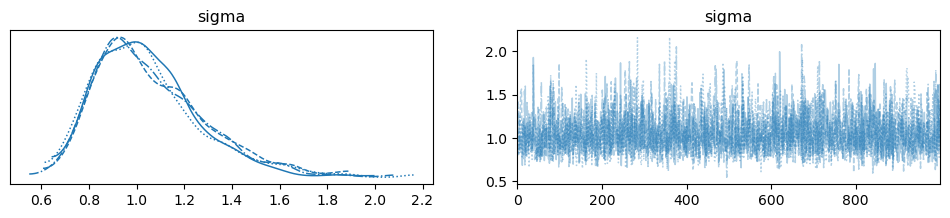

In [9]:
with lm:    
    #az.plot_trace(tl.posterior["c"]);
    az.plot_trace(tl.posterior["d"]);
    az.plot_trace(tl.posterior["e"]);
    az.plot_trace(tl.posterior["sigma"]);

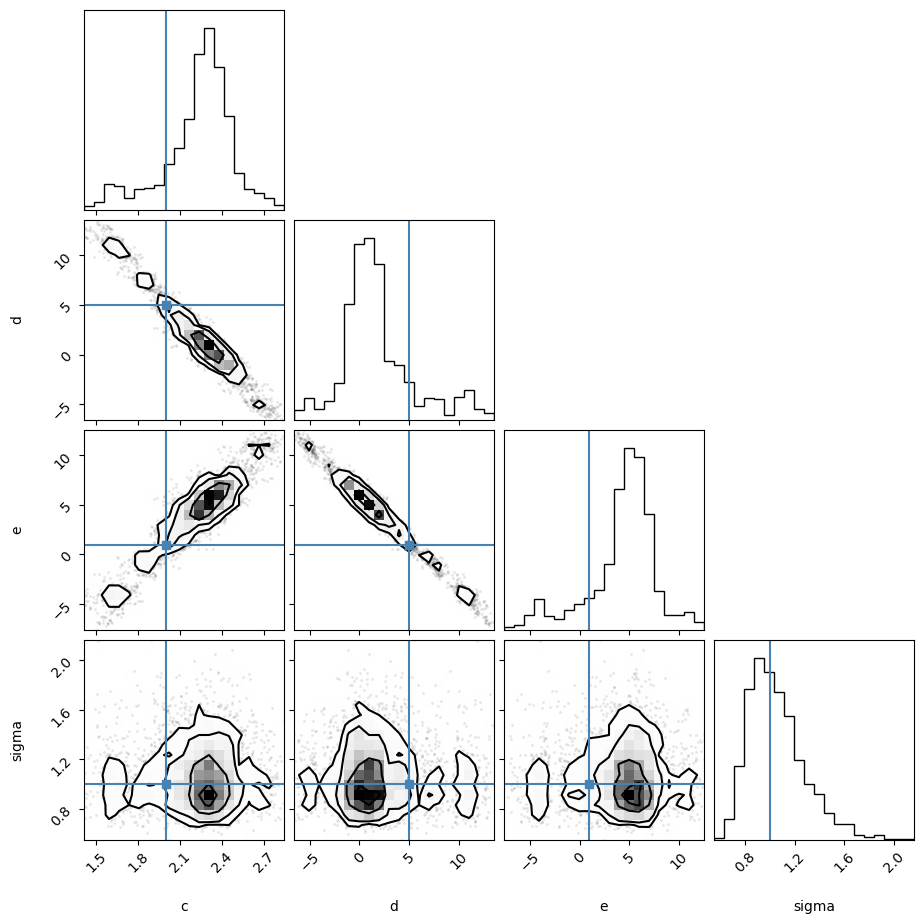

In [11]:
samp = np.asarray([np.array(tl.posterior["c"]).flatten(),np.asarray(tl.posterior["d"]).flatten(),np.asarray(tl.posterior["e"]).flatten(),np.asarray(tl.posterior["sigma"]).flatten()]).T

truths = [c,d,e,1]
names = ["c","d","e","sigma"]

figure = corner.corner(samp, labels=names, truths=truths)
plt.show()

In [16]:
with lm:
    ppc_samp= pm.sample_posterior_predictive(tl)
ppc_v = np.asarray(ppc_samp["posterior_predictive"].vals)


Sampling: [vals]


c:\Users\lizar\anaconda3\envs\pymc_env\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

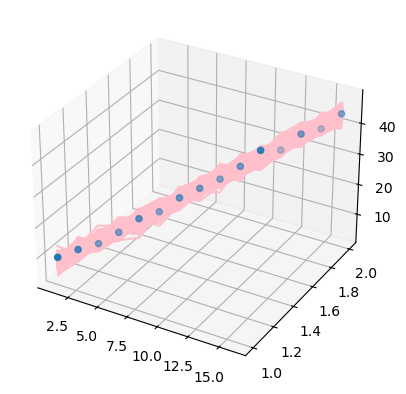

In [27]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(w,v,z,'grey')
ax.scatter3D(w,v,z)
for j in ppc_v[0]:
    ax.plot3D(w,v,j,'pink')

In [ ]:
file_path = 'datasets/Donor1_CD4_Genes.csv'

df = pd.read_csv(file_path)

print(df.head())